# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base URL to GET requests to retrieve data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [5]:
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [25]:
# Set up lists to hold reponse info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind_speed = []

# Set initial count quantities for organization
count_one = 0
set_one = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)

        print(f'Processing Record {count_one} of Set {set_one} | {city}')
        
    except:
        print('City not found. Skipping...')
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | pointe-noire
Processing Record 2 of Set 1 | birao
Processing Record 3 of Set 1 | graaff-reinet
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | tanta
Processing Record 6 of Set 1 | navalmoral de la mata
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | albany
City not found. Skipping...
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | visby
Processing Record 12 of Set 1 | mayo
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | visnes
Processing Record 17 of Set 1 | katete
City not found. Skipping...
Processing Record 18 of Set 1 | lagoa
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | sorland
Processing Record 22 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# Create values dictionary from API call lists.
weather_dict = {
    "City": city_name,
    "Lats": lats,
    "Lngs": lngs,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

# Create new DataFrame for values in dictionary.
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lats,Lngs,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pointe-noire,-4.7761,11.8635,25.04,94,75,1.54,CG,1668918395
1,birao,10.2849,22.7882,18.22,27,72,3.11,CF,1668918396
2,graaff-reinet,-32.2522,24.5308,12.74,61,0,1.01,ZA,1668918396
3,atuona,-9.8000,-139.0333,25.31,70,42,4.85,PF,1668918397
4,tanta,30.7885,31.0019,15.92,83,6,3.12,EG,1668918397


In [42]:
# Output data to csv
weather_data.to_csv("weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

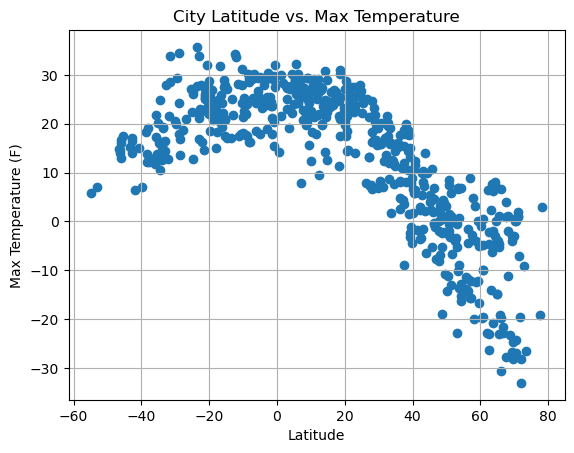

In [51]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lats"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevsLatitude.png")

# Show plot
plt.show()

This scatter plot shows that as a city increases in latitude (above the Equator), the lower the temperature the city becomes. For example, a city with -20 degree latitude (below the Equator) can reach a temperature of 30 degrees Fahrenheit and the same, when a city has a 75 degree latitude and a negative temperature (-35 degrees Fahrenheit). The analysis gathered from this plot is that there is a strong negative linear correlation between latitude and temperature.

## Latitude vs. Humidity Plot

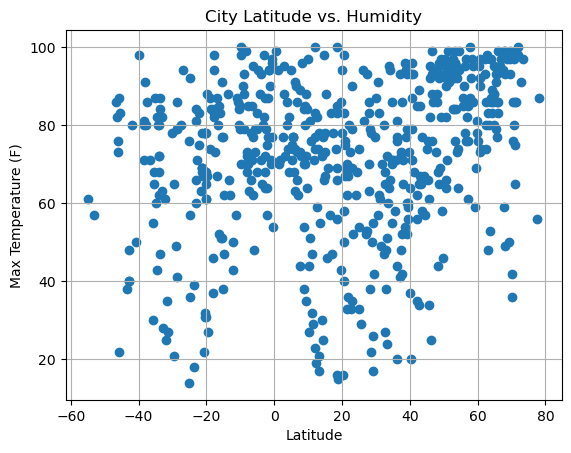

In [52]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lats"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevsHumidity.png")

# Show plot
plt.show()

The analysis gathered from this plot is that there is a no pattern present therefore no correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

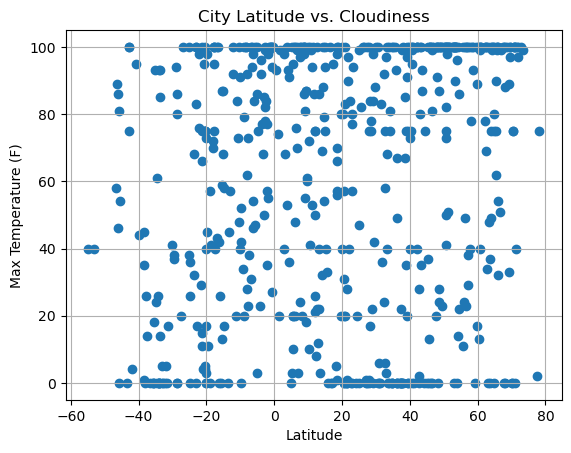

In [53]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lats"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevsCloudiness.png")

# Show plot
plt.show()

The analysis gathered from this plot is that there is a no pattern present therefore no correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

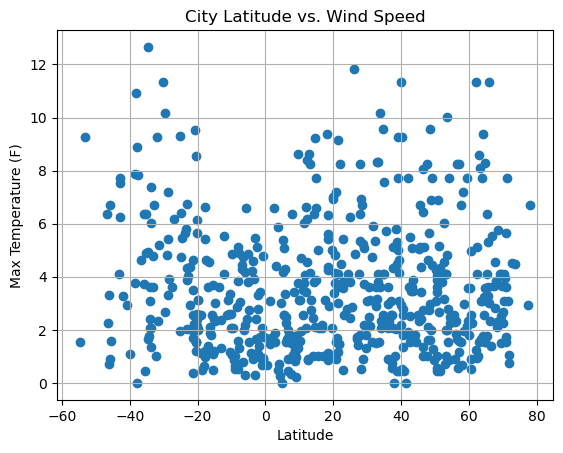

In [54]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lats"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevsWindSpeed.png")

# Show plot
plt.show()

The analysis gathered from this plot is that there is a strong pattern present therefore no correlation between latitude and wind speed.

## Linear Regression

In [73]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = weather_data.loc[pd.to_numeric(weather_data["Lats"]).astype(float) > 0, :]
southern_hem = weather_data.loc[pd.to_numeric(weather_data["Lats"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

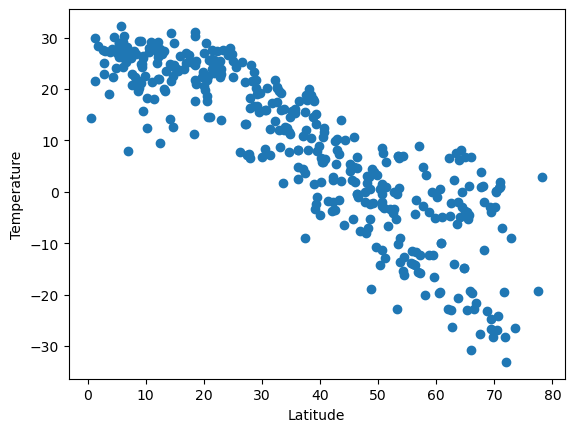

In [74]:
# Create a Scatter Plot for temperature vs latitude
x_values = northern_hem["Lats"]
y_values = northern_hem["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [75]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      25.782404
4      12.601770
5       6.749889
6      -7.755520
8       5.008743
         ...    
563    15.332125
564    11.944397
565     1.387984
567    19.033561
570    30.581369
Name: Lats, Length: 384, dtype: float64


In [76]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.64x +32.39


The r-value is: 0.7436069284523696


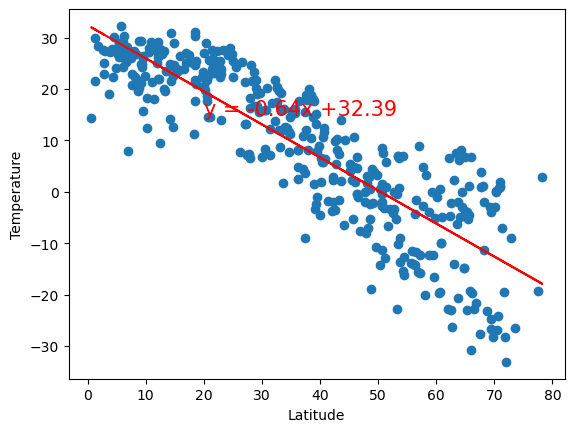

In [77]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

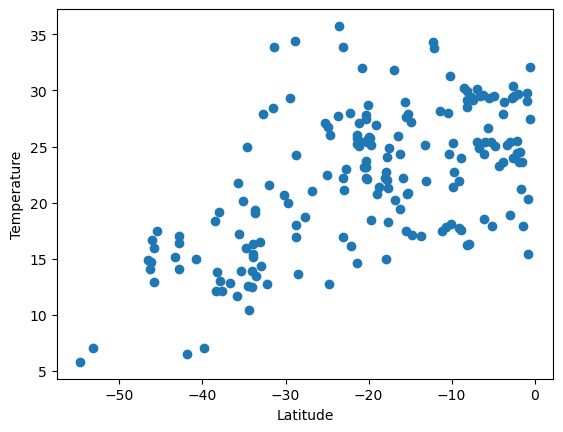

In [78]:
# Create a Scatter Plot for temperature vs latitude
x_values = southern_hem["Lats"]
y_values = southern_hem["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [79]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      26.340636
2      18.790377
3      24.960100
7      23.123571
9      18.330482
         ...    
560    17.563561
562    24.996977
566    27.167902
568    20.064760
569    22.093095
Name: Lats, Length: 187, dtype: float64


In [80]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.27x +27.65


The r-value is: 0.344910488749054


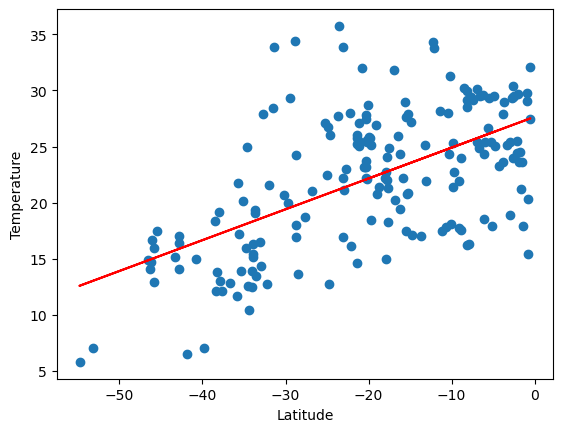

In [81]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In comparing Northern Hemisphere and Southern Hemisphere with temperature and latitude, the Northern Hemisphere displays a negative correlation and the Southern Hemisphere displays a positive correlation. In the Nothern Hemisphere, as you move away from the equator the temperature decreases. In the Southern Hemisphere, as you get closer to the equator the temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

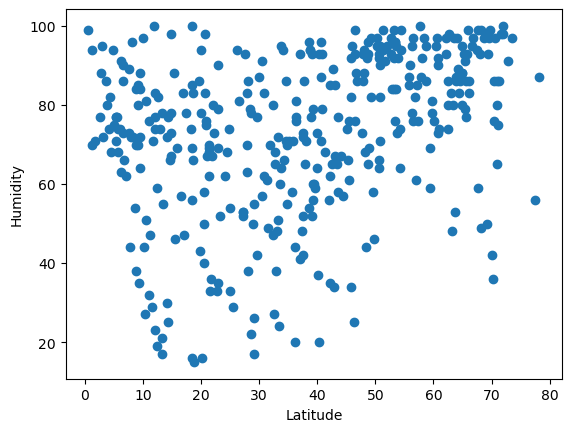

In [82]:
# Create a Scatter Plot for humidity vs latitude
x_values = northern_hem["Lats"]
y_values = northern_hem["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [83]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      64.156877
4      70.783023
5      73.724870
6      81.017004
8      74.600175
         ...    
563    69.410423
564    71.113496
565    76.420397
567    67.549644
570    61.744350
Name: Lats, Length: 384, dtype: float64


In [84]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.32x +60.83


The r-value is: 0.1043670678898113


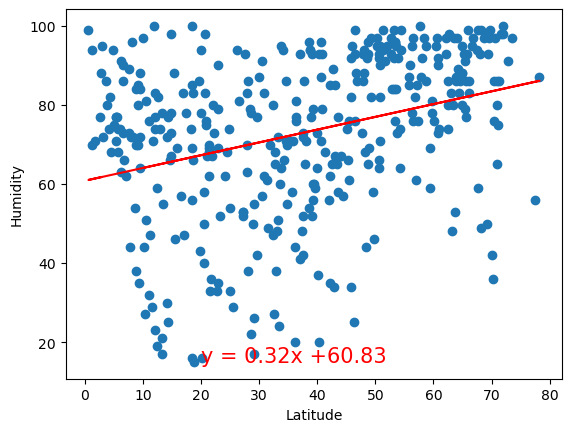

In [86]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

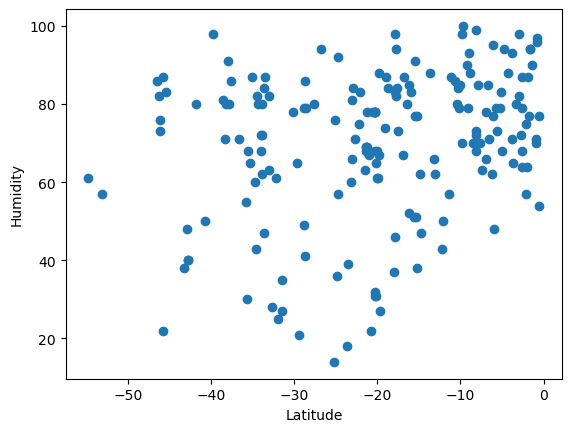

In [102]:
# Create Plot
# Create a Scatter Plot for temperature vs latitude
x_values = southern_hem["Lats"]
y_values = southern_hem["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [103]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      75.524555
2      65.117626
3      73.621688
7      71.090301
9      64.483728
         ...    
560    63.426639
562    73.672518
566    76.664821
568    66.874177
569    69.669940
Name: Lats, Length: 187, dtype: float64


In [104]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.38x +77.33


The r-value is: 0.06869284060265994


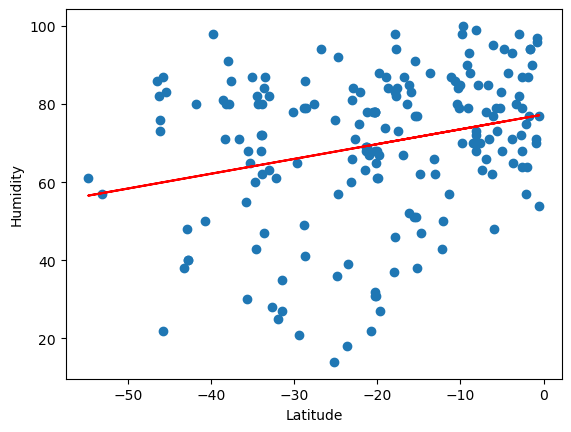

In [105]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In comparing Northern Hemisphere and Southern Hemisphere with humidity and latitude, both display a weak positive correlation. Could be noted that in the Southern Hemisphere, as you get closer to the equator the humidity increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

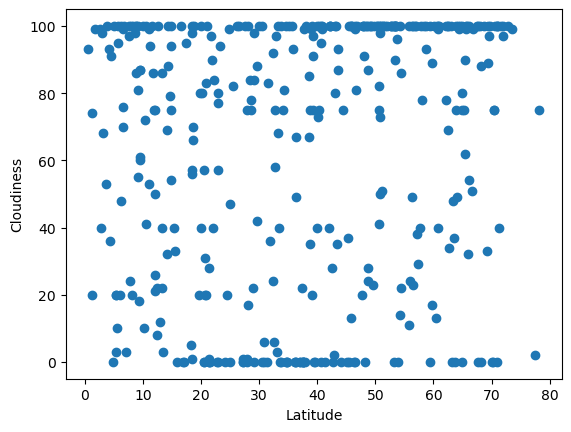

In [106]:
# Create a Scatter Plot for temperature vs latitude
x_values = northern_hem["Lats"]
y_values = northern_hem["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [108]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      55.522619
4      60.724487
5      63.033990
6      68.758694
8      63.721151
         ...    
563    59.646925
564    60.983926
565    65.150119
567    58.186117
570    53.628659
Name: Lats, Length: 384, dtype: float64


In [109]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.25x +52.91


The r-value is: 0.01762368686925969


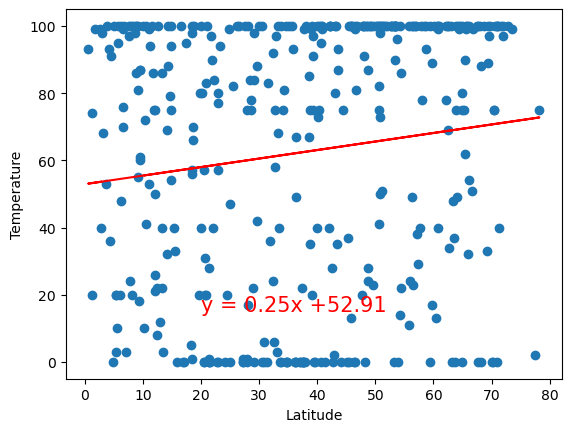

In [110]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

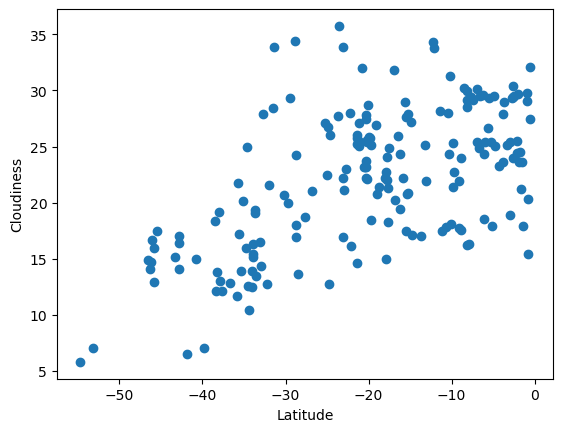

In [113]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = southern_hem["Lats"]
y_values = southern_hem["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [114]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      26.340636
2      18.790377
3      24.960100
7      23.123571
9      18.330482
         ...    
560    17.563561
562    24.996977
566    27.167902
568    20.064760
569    22.093095
Name: Lats, Length: 187, dtype: float64


In [115]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


y = 0.27x +27.65


The r-value is: 0.344910488749054


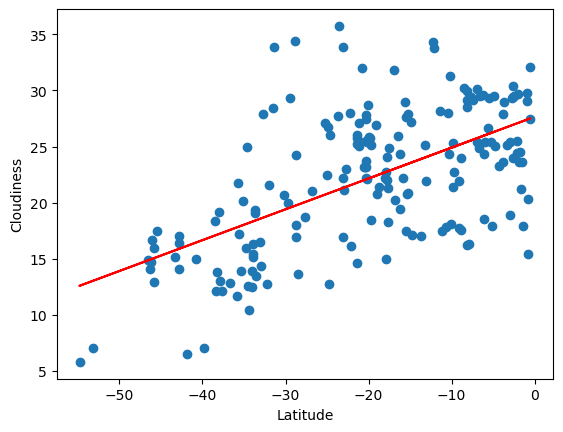

In [116]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In comparing Northern Hemisphere and Southern Hemisphere with cloudiness and latitude, northern hemisphere displays no correlation. Southern hemisphere displays a srong positive correlations; this shows that as the cities move to the Equator, the cloudiness increases in visibility.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

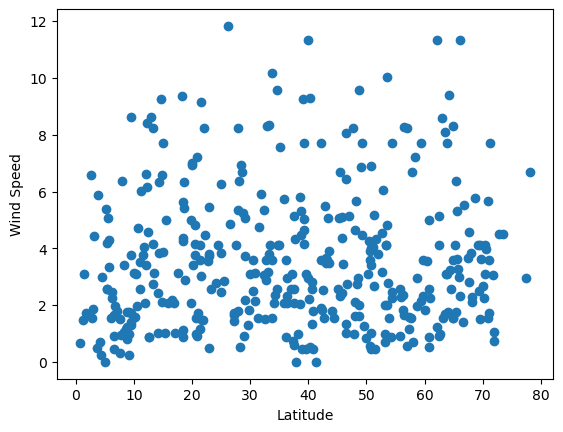

In [117]:
# Create a Scatter Plot for wind speed vs latitude
x_values = northern_hem["Lats"]
y_values = northern_hem["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [118]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      3.359537
4      3.515372
5      3.584558
6      3.756055
8      3.605144
         ...   
563    3.483091
564    3.523144
565    3.647952
567    3.439329
570    3.302799
Name: Lats, Length: 384, dtype: float64


In [119]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


y = 0.01x +3.28


The r-value is: 0.004180011925619877


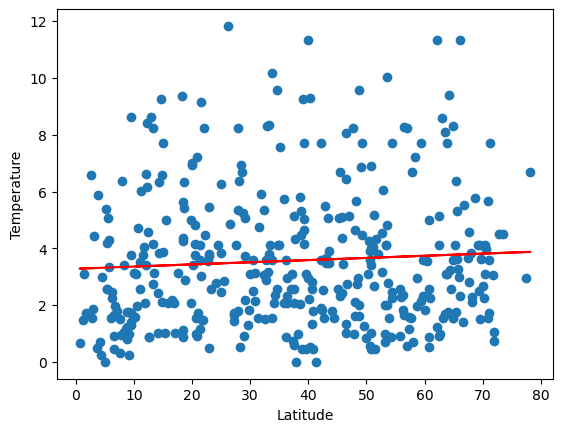

In [120]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

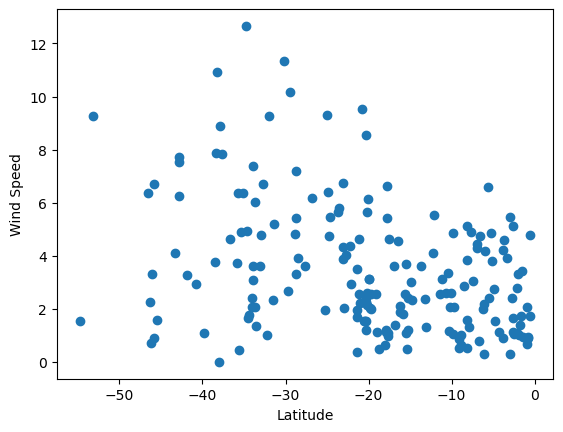

In [124]:
# Create a Scatter Plot for wind speed vs latitude
x_values = southern_hem["Lats"]
y_values = southern_hem["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [125]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      2.429342
2      4.265777
3      2.765127
7      3.211823
9      4.377636
         ...   
560    4.564173
562    2.756158
566    2.228128
568    3.955811
569    3.462463
Name: Lats, Length: 187, dtype: float64


In [126]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.07x +2.11


The r-value is: 0.1297701094025896


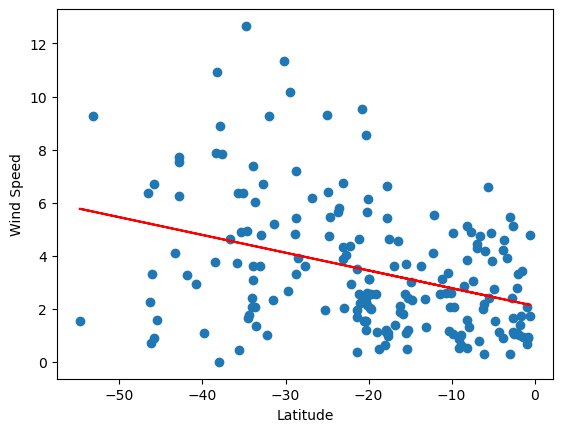

In [127]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In comparing Northern Hemisphere and Southern Hemisphere with wind speed and latitude, northern hemisphere displays no correlation. Southern hemisphere displays a srong negative correlations; this shows that as the cities move towards the Equator, the wind speed decreases with little to no presence.